Dataset Shape: (10000, 50, 50, 1)
Labels Shape: (10000, 2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       495,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,626 (1.96 MB)

 Trainable params: 514,626 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - loss: 0.0499 - mae: 0.1482 - val_loss: 0.0019 - val_mae: 0.0325
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - loss: 0.0065 - mae: 0.0603 - val_loss: 0.0013 - val_mae: 0.0278
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - loss: 0.0053 - mae: 0.0543 - val_loss: 0.0017 - val_mae: 0.0319
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - loss: 0.0045 - mae: 0.0499 - val_loss: 7.8249e-04 - val_mae: 0.0212
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - loss: 0.0040 - mae: 0.0472 - val_loss: 8.3878e-04 - val_mae: 0.0216
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - loss: 0.0039 - mae: 0.0462 - val_loss: 7.8668e-04 - val_mae: 0.0199
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - loss: 0.0038 - mae: 0.0455 - val_loss: 9.4454e-04 - val_mae: 0.0238
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - loss: 0.0036 - mae: 0.0445 - val_loss: 7.1920e-04 - val_mae: 0.0208
Epoch 9/10
225/225 

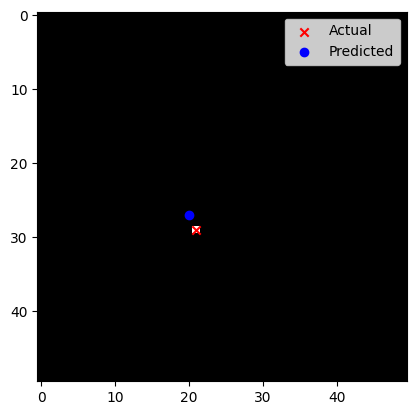

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Actual: (20, 37), Predicted: (20, 38)


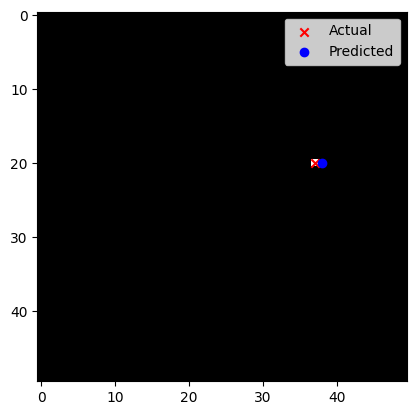

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# 1. Dataset Generation
def generate_dataset(num_images=10000, img_size=50):
    images = np.zeros((num_images, img_size, img_size, 1), dtype=np.float32)
    coords = np.zeros((num_images, 2), dtype=np.float32)

    for i in range(num_images):
        # Pick random x, y
        x = np.random.randint(0, img_size)
        y = np.random.randint(0, img_size)

        # Set pixel to 255
        images[i, x, y, 0] = 255.0

        # Store normalized coordinates (0 to 1 range)
        coords[i, 0] = x / img_size
        coords[i, 1] = y / img_size

    # Normalize image pixels to 0-1
    images = images / 255.0
    return images, coords

# Generate 10,000 samples
IMG_SIZE = 50
X, y = generate_dataset(num_images=10000, img_size=IMG_SIZE)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dataset Shape: {X.shape}")
print(f"Labels Shape: {y.shape}")

# 2. Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='linear') # Output layer: x and y
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# 3. Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 4. Evaluation
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Set: {mae:.4f}")

# 5. Prediction Example
def predict_pixel(index):
    sample_img = X_test[index]
    actual_coords = y_test[index]

    # Predict
    pred_coords = model.predict(sample_img.reshape(1, IMG_SIZE, IMG_SIZE, 1))

    # Rescale back to 50x50
    pred_x = int(pred_coords[0][0] * IMG_SIZE)
    pred_y = int(pred_coords[0][1] * IMG_SIZE)
    act_x = int(actual_coords[0] * IMG_SIZE)
    act_y = int(actual_coords[1] * IMG_SIZE)

    print(f"Actual: ({act_x}, {act_y}), Predicted: ({pred_x}, {pred_y})")

    plt.imshow(sample_img.reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.scatter(act_y, act_x, c='red', marker='x', label='Actual')
    plt.scatter(pred_y, pred_x, c='blue', marker='o', label='Predicted', facecolors='none')
    plt.legend()
    plt.show()

# Test with a few samples
predict_pixel(0)
predict_pixel(10)

## Dataset Rationale

No real-world dataset was provided for this problem, so a synthetic dataset was generated.
Each image is of size 50×50 pixels with exactly one pixel set to a value of 255 and all
other pixels set to 0. The position of the bright pixel represents the ground-truth
coordinate (x, y).

Synthetic data was chosen because it allows full control over pixel placement, ensures
uniform coverage of all possible coordinates, and removes noise so the model can focus
purely on learning spatial relationships.

---

## Model Explanation

A Convolutional Neural Network (CNN) was used to solve this problem as CNNs are well-suited
for image-based tasks and spatial feature extraction.

The model consists of:
- Convolutional layers to detect spatial patterns and locate the bright pixel
- Max pooling layers to reduce dimensionality while preserving important features
- Fully connected (dense) layers to regress the final (x, y) coordinates

The output layer contains two neurons representing the predicted x and y pixel positions.
Mean Squared Error (MSE) was used as the loss function since this is a regression problem.

---

## Results Summary

The trained model successfully learns the mapping between input images and pixel coordinates.
Training and validation loss decrease steadily, indicating effective learning.

Visual comparisons between ground-truth and predicted coordinates show that the model is
able to accurately localize the bright pixel in unseen images. Minor prediction differences
are acceptable as the primary focus of this assignment is the approach rather than perfect
accuracy.